<a href="https://colab.research.google.com/github/Anna-Surma/Detecto-detection/blob/main/detecto_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install detecto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import os
from detecto.core import Model, Dataset
from google.colab import drive

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/zadanie')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!ls

test  test.csv	train  train.csv


In [6]:
import detecto
from detecto import utils
detecto.utils.xml_to_csv('train/annotations', 'train.csv')
detecto.utils.xml_to_csv('test/annotations', 'test.csv')


,filename,width,height,class,xmin,ymin,xmax,ymax,image_id
0,road796.png,300,400,speedlimit,133,170,154,191,0
1,road801.png,300,400,speedlimit,150,131,210,191,1
2,road741.png,300,400,speedlimit,98,202,176,283,2
3,road741.png,300,400,speedlimit,99,77,179,156,2
4,road842.png,300,400,speedlimit,74,153,125,203,3
...,...,...,...,...,...,...,...,...,...
351,road822.png,300,400,stop,106,77,168,140,213
352,road822.png,300,400,crosswalk,183,317,201,340,213
353,road695.png,300,400,speedlimit,134,170,156,192,214
354,road695.png,300,400,speedlimit,135,205,156,225,214


In [7]:
from torchvision import transforms
from detecto import core
transform_img = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(800),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor(),
    utils.normalize_transform(),
])

In [8]:
dataset = detecto.core.Dataset('train.csv', 'train/images/', transform=transform_img)

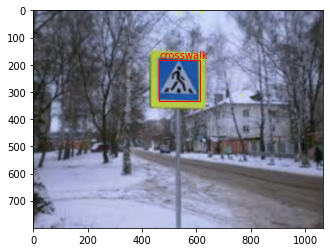

In [9]:
from detecto import visualize
image, information = dataset[1] 
detecto.visualize.show_labeled_image(image, information['boxes'], information['labels'])

In [10]:
dataloader = detecto.core.DataLoader(dataset)
dataloader

In [11]:
validation_data = detecto.core.Dataset('train.csv', 'train/images/')

In [12]:
classifier = core.Model(['speedlimit', 'crosswalk', 'stop', 'trafficlight'])

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

In [13]:
history = classifier.fit(dataloader, validation_data, epochs = 10, verbose = True)

Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 599/599 [10:58<00:00,  1.10s/it]


Begin iterating over validation dataset


100%|██████████| 599/599 [01:12<00:00,  8.30it/s]


Loss: 0.11429334761192385
Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 599/599 [02:40<00:00,  3.74it/s]


Begin iterating over validation dataset


100%|██████████| 599/599 [01:14<00:00,  8.07it/s]


Loss: 0.08969826627839886
Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 599/599 [02:42<00:00,  3.69it/s]


Begin iterating over validation dataset


100%|██████████| 599/599 [01:14<00:00,  8.03it/s]


Loss: 0.07261823432890073
Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 599/599 [02:43<00:00,  3.67it/s]


Begin iterating over validation dataset


100%|██████████| 599/599 [01:14<00:00,  8.04it/s]


Loss: 0.04933951645218868
Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 599/599 [02:43<00:00,  3.67it/s]


Begin iterating over validation dataset


100%|██████████| 599/599 [01:14<00:00,  8.00it/s]


Loss: 0.043755679780023427
Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 599/599 [02:43<00:00,  3.66it/s]


Begin iterating over validation dataset


100%|██████████| 599/599 [01:14<00:00,  8.01it/s]


Loss: 0.043152893926848804
Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 599/599 [02:43<00:00,  3.67it/s]


Begin iterating over validation dataset


100%|██████████| 599/599 [01:14<00:00,  8.03it/s]


Loss: 0.04156037740555525
Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 599/599 [02:43<00:00,  3.67it/s]


Begin iterating over validation dataset


100%|██████████| 599/599 [01:14<00:00,  8.02it/s]


Loss: 0.04104173347821929
Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 599/599 [02:43<00:00,  3.66it/s]


Begin iterating over validation dataset


100%|██████████| 599/599 [01:14<00:00,  8.03it/s]


Loss: 0.04131231334127287
Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 599/599 [02:43<00:00,  3.66it/s]


Begin iterating over validation dataset


100%|██████████| 599/599 [01:14<00:00,  8.04it/s]

Loss: 0.040933001508939394


In [14]:
classifier.save('model_learn.pth')

In [15]:
model = core.Model.load('model_learn.pth', ['speedlimit', 'crosswalk', 'stop', 'trafficlight'])

In [16]:
from PIL import Image
import numpy as np

def detect():
  file_path = 'test/images/'
  for all_image in os.listdir(file_path):
    image_path = os.path.join(file_path, all_image)
    image = utils.read_image(image_path)
    
    image_dim = Image.open(image_path)
    image_width, image_height = image_dim.size

    lebels, boxes, scores = model.predict(image)
    place = 0 
    lebels_ost = []
    boxes_ost = []
    scores_ost = []
    
    for score in scores:
      if score > 0.5:
        if lebels[place] == "speedlimit":
          if (((boxes[place][2] - boxes[place][0]) > (1/10)*image_width) & ((boxes[place][3] - boxes[place][1]) > (1/10)*image_height)):
            lebels_ost.append(lebels[place])
            boxes_ost.append(boxes[place])
            scores_ost.append(score)
            place = place+1 
    if(len(boxes_ost) != 0 ):
      print(all_image)
      print(len(boxes_ost))
      for i in range(0,len(boxes_ost)):
        boxes_ok_size = np.around(boxes_ost[i].numpy())
        boxes_ok_size = boxes_ok_size.astype(int)
        print(boxes_ok_size)


detect()

road842.png
1
[ 73 153 124 203]
road829.png
1
[ 93 141 167 211]
road731.png
2
[ 69 226 115 271]
[ 67 154 111 201]
road693.png
2
[ 54 136 143 220]
[ 53 270 140 357]
road664.png
2
[ 86 199 157 274]
[ 87 116 158 189]
road867.png
1
[ 73 125 124 176]
road816.png
1
[ 92 181 142 232]
road827.png
1
[120 112 178 169]
road712.png
1
[ 98 140 139 181]
road694.png
2
[100 128 203 230]
[ 99 291 203 392]
road836.png
1
[145 124 205 185]
road815.png
1
[123 151 165 193]
road810.png
1
[129 175 169 216]
road732.png
2
[103 188 165 250]
[100  96 160 156]
road801.png
1
[150 131 210 191]
road726.png
2
[138 157 219 238]
[142  66 224 145]
road740.png
2
[113 210 171 270]
[115 118 173 176]
road784.png
1
[104 107 180 182]
road745.png
2
[ 45 200  90 244]
[ 50 132  93 177]
road683.png
1
[ 86 204 140 259]
road733.png
2
[118 200 193 275]
[112  86 188 161]
road690.png
2
[ 99 152 142 192]
[ 99 217 141 257]
road818.png
1
[132 162 236 267]
road775.png
1
[110 130 149 171]
road782.png
1
[ 93 109 142 157]
road662.png
1
[ 78 1